In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os 
from sklearn.model_selection import train_test_split
%matplotlib inline

# Whole precess
* download dataset and do some simple data preprocessig
* data analysis and visulization 
* splitting data into train_df, val_df, test_df
* handling data such as fill missing value, OneHotEncoder and so on
* train model and test 
* eval model
* prediction
* visulizing prediction


# Downloading data and import data

In [2]:
df = pd.read_csv(r"D:\Machine_learning_course\models\weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.dropna(subset=["RainTomorrow","RainToday"], inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

# Data analysis and visulization

# Train_test_split

<Axes: xlabel='Date', ylabel='count'>

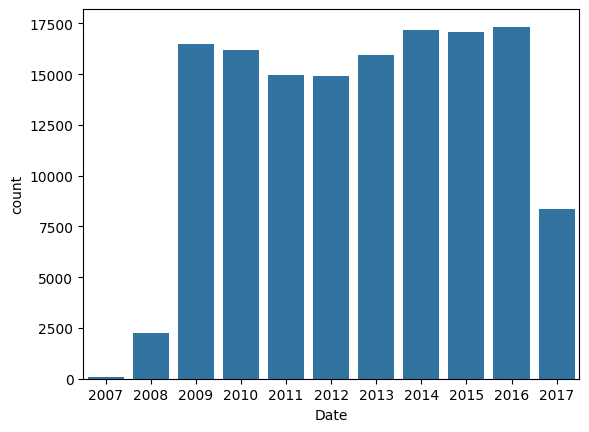

In [7]:
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

In [8]:
year = pd.to_datetime(df.Date).dt.year

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [10]:
year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: Date, Length: 140787, dtype: int32

In [11]:
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [12]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [13]:
input = (train_df.columns)[1:-1].tolist()
target = "RainTomorrow"

In [14]:
input

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [15]:
numeric = train_df[input].select_dtypes(include="number").columns.tolist()
categorical = train_df[input].select_dtypes(include="object").columns.tolist()

In [16]:
numeric 

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [17]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [18]:
train_input = train_df[input]
train_target = train_df[target]

val_input = val_df[input]
val_target = val_df[target]

test_input = test_df[input]
test_target = test_df[target]

In [19]:
print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)
print(test_input.shape, test_target.shape)

(97988, 21) (97988,)
(17089, 21) (17089,)
(25710, 21) (25710,)


# fill missing value and scaling and onehotencoder

In [20]:
import numpy as np
from sklearn.impute import SimpleImputer

In [21]:
df[numeric].shape

(140787, 16)

In [22]:
# fill null value
imp = SimpleImputer(strategy="median")
imp.fit(df[numeric])
train_input[numeric] = imp.transform(train_input[numeric])
val_input[numeric] = imp.transform(val_input[numeric])
test_input[numeric] = imp.transform(test_input[numeric])
df[numeric] = imp.transform(df[numeric])

C:\Users\LEX\AppData\Local\Temp\ipykernel_33584\3348867447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input[numeric] = imp.transform(train_input[numeric])
C:\Users\LEX\AppData\Local\Temp\ipykernel_33584\3348867447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input[numeric] = imp.transform(val_input[numeric])
C:\Users\LEX\AppData\Local\Temp\ipykernel_33584\3348867447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [23]:
list(imp.statistics_)

[np.float64(12.0),
 np.float64(22.6),
 np.float64(0.0),
 np.float64(4.8),
 np.float64(8.5),
 np.float64(39.0),
 np.float64(13.0),
 np.float64(19.0),
 np.float64(70.0),
 np.float64(52.0),
 np.float64(1017.6),
 np.float64(1015.2),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(16.7),
 np.float64(21.1)]

In [24]:
train_input[numeric].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [25]:
df[numeric].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Scaler
scaler = StandardScaler()
scaler.fit(df[numeric])

train_input[numeric] = scaler.transform(train_input[numeric])
val_input[numeric] = scaler.transform(val_input[numeric])
test_input[numeric] = scaler.transform(test_input[numeric])

C:\Users\LEX\AppData\Local\Temp\ipykernel_33584\1995091687.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input[numeric] = scaler.transform(train_input[numeric])
C:\Users\LEX\AppData\Local\Temp\ipykernel_33584\1995091687.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input[numeric] = scaler.transform(val_input[numeric])
C:\Users\LEX\AppData\Local\Temp\ipykernel_33584\1995091687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [28]:
train_input

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,0.190169,-0.046960,-0.206727,-0.12118,0.164613,W,0.311578,W,WNW,...,0.615022,0.113946,-1.433926,-1.474141,-1.219942,1.458738,0.141848,-0.013228,0.017149,No
1,Albury,-0.748326,0.262604,-0.277606,-0.12118,0.164613,WNW,0.311578,NNW,WSW,...,0.385631,-1.310031,-1.287920,-1.044459,-1.115191,0.154823,0.141848,0.033062,0.380877,No
2,Albury,0.111961,0.347030,-0.277606,-0.12118,0.164613,WSW,0.463856,W,WSW,...,0.844412,-1.626470,-1.044576,-1.488958,-0.980512,0.154823,-1.270815,0.619403,0.220837,No
3,Albury,-0.466778,0.670665,-0.277606,-0.12118,0.164613,NE,-1.211197,SE,E,...,-1.105406,-1.257291,-1.725938,-0.007297,-0.366971,0.154823,0.141848,0.171932,0.700958,No
4,Albury,0.831474,1.275721,-0.159474,-0.12118,0.164613,W,0.083162,ENE,NW,...,0.156241,0.694085,-0.898570,-1.014826,-1.384551,1.024100,1.554511,0.125642,1.166530,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.737625,1.402361,-0.277606,-0.12118,0.164613,SSE,0.235440,ESE,SSE,...,0.844412,-2.470308,-1.871945,-0.525878,-0.815903,0.154823,0.141848,1.036014,1.472061,No
144549,Uluru,0.456076,1.908920,-0.277606,-0.12118,0.164613,NE,-0.678225,ENE,SW,...,0.156241,-2.786747,-2.115288,-0.748127,-1.145120,0.154823,0.141848,1.838376,1.908535,No
144550,Uluru,0.800191,2.049631,-0.277606,-0.12118,0.164613,ESE,-0.069115,ESE,SSE,...,-1.105406,-2.839487,-2.115288,-0.851844,-1.085263,0.154823,0.141848,1.961816,2.039477,No
144551,Uluru,1.238155,2.148128,-0.277606,-0.12118,0.164613,ESE,0.235440,ESE,SSW,...,-0.187845,-2.470308,-2.066619,-0.540695,-0.905690,0.154823,0.141848,1.977246,2.257713,No


In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [31]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [32]:
# OneHotEncoder
eod = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop="first")
eod.fit(df[categorical])
new_columns = eod.get_feature_names_out(categorical) # get all columns for categorical features

encoded_dense_train = eod.transform(train_input[categorical])
encoded_dense_val = eod.transform(val_input[categorical])
encoded_dense_test = eod.transform(test_input[categorical])

encoded_train_input = pd.DataFrame(
    encoded_dense_train,           
    columns=new_columns,      
    index=train_input.index   
)
encoded_val_input = pd.DataFrame(
    encoded_dense_val,           
    columns=new_columns,     
    index=val_input.index  
)
encoded_test_input = pd.DataFrame(
    encoded_dense_test,          
    columns=new_columns,   
    index=test_input.index   
)

# drop original columns 
train_input.drop(columns=categorical, inplace=True)
val_input.drop(columns=categorical, inplace=True)
test_input.drop(columns=categorical, inplace=True)

# Combine train_input and encoded_columns
train_input = pd.concat([train_input, encoded_train_input], axis=1)
val_input = pd.concat([val_input,encoded_val_input], axis=1)
test_input = pd.concat([test_input, encoded_test_input], axis=1)

C:\Users\LEX\AppData\Local\Temp\ipykernel_33584\515670626.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_input.drop(columns=categorical, inplace=True)
C:\Users\LEX\AppData\Local\Temp\ipykernel_33584\515670626.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_input.drop(columns=categorical, inplace=True)
C:\Users\LEX\AppData\Local\Temp\ipykernel_33584\515670626.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test

In [33]:
len(new_columns) 

97

In [34]:
print(train_input.shape, train_target.shape)
print(val_input.shape, val_target.shape)
print(test_input.shape, test_target.shape)

(97988, 113) (97988,)
(17089, 113) (17089,)
(25710, 113) (25710,)


In [35]:
print(encoded_dense_train.shape)
print(encoded_dense_val.shape)
print(encoded_dense_test.shape)

(97988, 97)
(17089, 97)
(25710, 97)


In [36]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [37]:
from sklearn.preprocessing import LabelEncoder

scaler_y = LabelEncoder()
scaler_y.fit(df[target])

train_target = scaler_y.transform(train_target)
val_target = scaler_y.transform(val_target)
test_target = scaler_y.transform(test_target)

In [38]:
train_target.shape

(97988,)

# Model train

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = DecisionTreeClassifier(random_state=42)
model_1 = RandomForestClassifier(random_state=42)

In [41]:
%%time
model.fit(train_input, train_target)
model_1.fit(train_input, train_target)

CPU times: total: 2.45 s
Wall time: 17.2 s


RandomForestClassifier(random_state=42)

In [42]:
# Decisinclassifier
print(model.score(train_input,train_target))
print(model.score(val_input,val_target))
print(model.score(test_input,test_target))

0.9999795893374699
0.7924395810170285
0.7738234150136134


In [43]:
# RandomForestClassifier
print(model_1.score(train_input,train_target))
print(model_1.score(val_input,val_target))
print(model_1.score(test_input,test_target))

0.9999693840062048
0.8589736087541694
0.8464021781408012


In [44]:
import pandas as pd

val_target_series = pd.Series(val_target)
val_target_series.value_counts() / len(val_target_series)

0    0.790626
1    0.209374
Name: count, dtype: float64

In [45]:
val_target_series

0        0
1        0
2        0
3        0
4        0
        ..
17084    0
17085    0
17086    0
17087    0
17088    0
Length: 17089, dtype: int64

# Hyperparameter tune

In [47]:
# for randomforestclassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV

model_1 = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# 4. 使用随机搜索
random_search = RandomizedSearchCV(
    estimator=model_1,
    param_distributions=param_dist,
    n_iter=5,             # 迭代次数，即随机采样次数
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# 5. 进行搜索并输出结果
random_search.fit(train_input, train_target)

print("最优参数组合：", random_search.best_params_)
print("最优得分：", random_search.best_score_)
print("测试集准确率：", random_search.score(train_input, train_target))